In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
np.random.seed(0)

In [2]:
class Canvas:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.area = width * height
        
class Sml_rec:
    def __init__(self,  height, width,   flip, bound, shape = None):
        
        self.f = flip
        self.bound = bound
        self.shape = shape
        self.length_width = len(bin(bound.width))-2
        self.length_height = len(bin(bound.height))-2
        code_widht = '{0:0rb}'.replace('r',f'{self.length_width}')
        code_height = '{0:0rb}'.replace('r',f'{self.length_height}')
        
        if flip:
            self.width = width
            self.height = height
            self.area = width * height
            self.p1 = np.random.randint(0, bound.height - self.height + 1)
            self.p2 = np.random.randint(0, bound.width - self.width + 1)
        else:
            self.width = height
            self.height = width
            self.area = width * height
            self.p1 = np.random.randint(0, bound.height - self.height)
            self.p2 = np.random.randint(0, bound.width - self.width)
            
        self.dna = code_height.format(self.p1) + code_widht.format(self.p2) + f'{self.f}'

    
        if self.shape is None:
            a = np.zeros(bound.area).reshape(bound.height,bound.width)
            a[self.p1:self.p1 + self.height, self.p2:self.p2 + self.width] = 1
        
        else:
            a = np.zeros(bound.area).reshape(bound.height,bound.width)
            a[self.p1:self.p1 + self.height, self.p2:self.p2 + self.width] = self.shape
            
        self.phenotype = a
        
    def xover(self,other):
        par1 = self.dna
        par2 = other.dna
#         position1 = np.random.randint(0, len(par1))
#         position2 = np.random.randint(0, len(par2))
        position = np.random.randint(0, len(par1))
#         chd1_dna = par1[:position2] + par2[position1] +  par1[position2+1:]
#         chd2_dna = par2[:position1] + par1[position1] +  par2[position1+1:]

        chd1_dna = par1[:position] + par2[position:]
        chd2_dna = par2[:position] + par1[position:]
        print(self.length_width)
        print(self.length_height)
        print(self.bound.width)
        print(self.bound.height)
        print(chd1_dna)
        print(chd2_dna)
        print('-'*30)
        chd1 = Sml_rec(int(chd1_dna[:self.length_height],2), int(chd1_dna[self.length_height:self.length_height + self.length_width],2), int(chd1_dna[-1],2), self.bound)
        chd2 = Sml_rec(int(chd2_dna[:self.length_height],2), int(chd2_dna[self.length_height:self.length_height + self.length_width],2), int(chd2_dna[-1],2), self.bound)
        return (chd1, chd2)
    
    def mutate(self):
        position = np.random.randint(0, len(self.dna))
        if self.dna[position] == '1':
            self.dna = self.dna[:position] + '1' + self.dna[position+1:]
        else:
            self.dna = self.dna[:position] + '0' + self.dna[position+1:]

In [3]:
bound = Canvas(100,100)

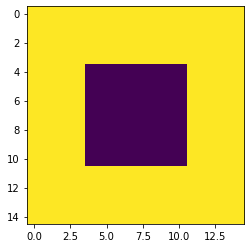

In [4]:
A1 = np.ones(15*15).reshape(15,15)
A1[4:11,4:11] = 0
plt.imshow(A1)

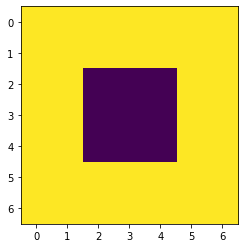

In [5]:
A2 = np.ones(7*7).reshape(7,7)
A2[2:5,2:5] = 0
plt.imshow(A2)

In [6]:
bound = Canvas(50,30)
G1 = Sml_rec(15,15,0,bound,shape=A1)
G2 = Sml_rec(7,7,0,bound,shape=A2)
G3 = Sml_rec(15,5,0,bound)
G4 = Sml_rec(15,5,1,bound)
G5 = Sml_rec(5,5,0,bound)
G6 = Sml_rec(3,3,0,bound)

In [7]:
Ar = G1.phenotype + G2.phenotype + G3.phenotype + G4.phenotype + G5.phenotype + G6.phenotype

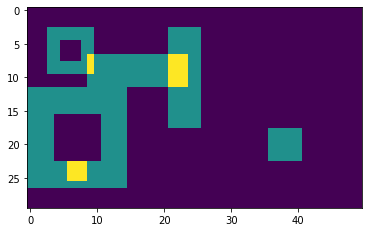

In [8]:
plt.imshow(Ar)

In [9]:
np.sum(Ar)

400.0

In [10]:
a = np.sum(Ar, axis = 0)

In [11]:
np.where(a==0)[0]

array([26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 41, 42, 43, 44, 45, 46, 47,
       48, 49], dtype=int64)

In [12]:
len(a)

50

In [13]:
for i,k in enumerate(a):
    if k != 0:
        print(i)
        break

0


In [14]:
A1 = np.ones(15*15).reshape(15,15)
A1[4:11,4:11] = 0

A2 = np.ones(7*7).reshape(7,7)
A2[2:5,2:5] = 0

def body(bound):
    #bound = Canvas(50,30)
    G1 = Sml_rec(15,15,0,bound,shape=A1)
    G2 = Sml_rec(7,7,0,bound,shape=A2)
    G3 = Sml_rec(15,5,0,bound)
    G4 = Sml_rec(15,5,1,bound)
    G5 = Sml_rec(5,5,0,bound)
    G6 = Sml_rec(3,3,0,bound)
    #Ar = G1.phenotype + G2.phenotype + G3.phenotype + G4.phenotype + G5.phenotype + G6.phenotype
    
    return [G1,G2,G3,G4,G5,G6]

def evaluate(Body,show=False):
    body = sum([g.phenotype for g in Body])
    border = np.where(body>0)
    area = body.shape[0]*body.shape[1]
    border_score = (border[0][0]*body.shape[1] + border[1][0]*body.shape[0]) / area
    
    none_overlab_score = np.sum(body <= 1) / area
    
    if show:
        plt.imshow(body)
    return 0.5 * border_score + 0.5 * none_overlab_score

def fight(pl1, pl2):
    if evaluate(pl1)>evaluate(pl2):
        return pl1
    else:
        return pl2
    

def crossOver(parent1, parent2):

    index = math.floor(random.random() * len(parent1))
    ch1, ch2 = parent1[index].xover(parent2[index])
    parent1[index] = ch1
    parent2[index] = ch2


    
    
    return parent1, parent2

def mutate(off):
    index = math.floor(random.random() * len(parent1))
    mu = off[index]
    off[index] = mu.mutate()
    
    return off

In [15]:
n_iter = 50
n_sel = 30
n_xover = 70
p_mutate = 0.2
n_pop = n_sel + n_xover

bound = Canvas(50,30)

pop_list = [body(bound) for _ in range(n_pop)]

while i<=n_iter:
    i+=1
    
    pop_eval = [evaluate(b) for b in pop_list]
    generation = sorted([[ls,ev] for ls, ev in zip(pop_list, pop_eval)],key=lambda x: x[1],reverse=True)

    survivor = [x[0] for x in generation]
    new_gen = survivor[:n_sel]

    for _ in range(n_sel, n_pop, 2):
        index1,index2,index3,index4 = [random.randint(0, n_sel-1) for _ in range(4)]
        
        parent1 = fight(new_gen[index1], new_gen[index2])
        parent2 = fight(new_gen[index3], new_gen[index4])

        offsprint1, offsprint2 = crossOver(parent1, parent2)

        if random.uniform(0,1)<p_mutate:
            offsprint1 = mutate(offsprint1)

        new_gen.append(offsprint1)
        new_gen.append(offsprint2)
        
    pop_list = new_gen
    
    #show
    Body = generation[0]
    Body = sum([g.phenotype for g in Body])
    plt.imshow(body)

6
5
50
30
100011000100
100100001000
------------------------------


ValueError: low >= high